# Projeto 2 - Ciência dos dados


### Felipe Rocha Sigiani             -- Turma: C
### João Vitor Rodrigues Silva     --    Turma: C
### Lucas Henrique Lemes Silva         --     Turma: B
### Matheus de Souza Pamplona Silva    --    Turma: B


In [1]:
import pandas as pd
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
arquivo = open("teste-ab.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

Parâmetros iniciais, e abertura do documento.

In [3]:
for k,v in dados_fire["logs"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [4]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [5]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [6]:
dataframe

,tempo,tipo,user_id,versao
0,1479287557445,inicio,161490244,A
1,1479288541643,inicio,785509936,A
2,1478270269594,inicio,2299771869,A
3,1479323431087,final,2914033577,A
4,1479290600253,inicio,2779827600,A
5,1479323290398,inicio,4187339032,A
6,1479062864803,inicio,1924079479,A
7,1478260974317,final,3563937844,B
8,1479289767444,inicio,753415774,A
9,1479330769046,inicio,537277891,A


In [7]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [8]:
users = set(dataframe.user_id)

O código acima converte o conjunto para que cada usuario apareça somente uma vez.

In [9]:
users = list(users) 

In [10]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys():  
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [11]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
35,1479323253232,inicio,1966625919,B
120,1479323258303,final,1966625919,B


In [12]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [13]:
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos

In [14]:
dataframe_resumo

,delta_t,user_id,versao
0,43235.968,1355150594,B
1,6.483,1561760900,B
2,30123.142,3789181448,B
3,14.813,2627218697,B
4,891.071,3705282954,A
5,19.305,2347875977,A
6,27.339,3643720589,A
7,2.715,2779827600,A
8,31.059,2779827600,B
9,8.915,2205262229,A


In [15]:
resultados_A=dataframe_resumo.query('versao == "A" and delta_t < 100 and delta_t>0')
resultados_B=dataframe_resumo.query('versao == "B" and delta_t < 100 and delta_t>0')

In [16]:
resultados_A.delta_t.describe()

count    20.000000
mean     13.020650
std      12.035537
min       2.393000
25%       5.369250
50%       8.927500
75%      13.891250
max      52.719000
Name: delta_t, dtype: float64

In [17]:
resultados_B.delta_t.describe()

count    14.000000
mean     13.433143
std      10.958310
min       4.477000
25%       6.312750
50%       8.281500
75%      16.506500
max      40.096000
Name: delta_t, dtype: float64

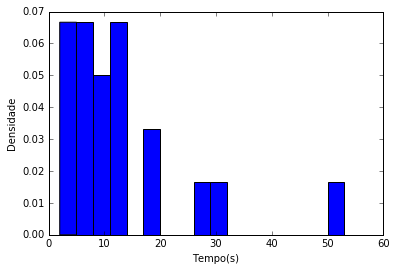

Média em segundos do tempo levado na versão A:  13.02065
Variancia em segundos do tempo levado na versão A:  144.85414592368423


In [18]:
plt.hist(resultados_A.delta_t, bins = range(2,55,3), normed = 1)
plt.ylabel("Densidade")
plt.xlabel("Tempo(s)")
plt.show()



print('Média em segundos do tempo levado na versão A: ',resultados_A.delta_t.mean() )
print('Variancia em segundos do tempo levado na versão A: ',resultados_A.delta_t.var() )

O histograma acima mostra que quase todos usuarios conseguem achar a pagina sobre mim em menos de 20 segundos, e que alguns usuarios chegaram demorar um poucos mais de 30 segundos.
Sendo o sobre mim no final da linha.

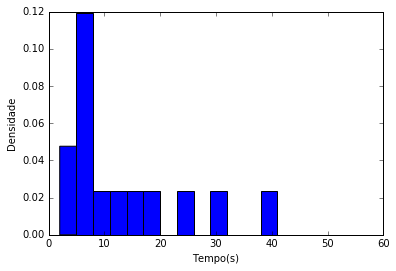

Média em segundos do tempo levado na versão B:  13.433142857142856
Variancia em segundos do tempo levado na versão B:  120.08455874725274


In [19]:
plt.hist(resultados_B.delta_t, bins = range(2,55,3), normed = 1)
plt.ylabel("Densidade")
plt.xlabel("Tempo(s)")
plt.show()

print('Média em segundos do tempo levado na versão B: ',resultados_B.delta_t.mean() )
print('Variancia em segundos do tempo levado na versão B: ',resultados_B.delta_t.var() )

Alterando a posição do sobre mim, obtivemos o novo histograma, que deixa claro que foi mais facil para os usuários achar o sobre mim, o que resultou em um tempo mínimo médio bem menor.

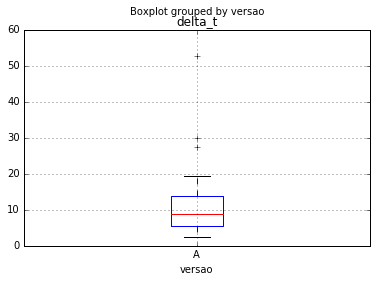

In [20]:
resultados_A.boxplot(column = "delta_t", by = "versao")

Com a exibição dessa bloxplot é possível verificar a tendência das visitas, dessa forma tendo a sua mediana em aproximadamente 9 segundos, e a comparação fica mais visível tendo a bloxplot para as duas versões.

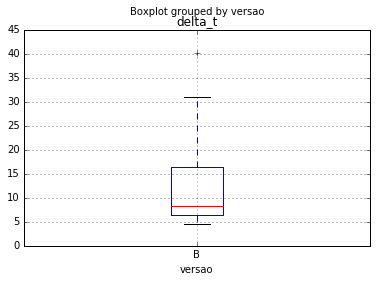

In [21]:
resultados_B.boxplot(column = "delta_t", by = "versao")

Com o gráfico para a versão B do site, é possível verificar um maior espalhamento dos quartis superiores, dessa forma, possuindo um desvio padrão maior em relação a primeira.

## Simulando para uma população maior

O número baixo de amostras captadas pelo site, não nos permite realizar uma afirmação concreta sobre a versão mais eficiênte.
Dessa forma vemos necessário expandir estes valores, por meio de simulações, de forma a encontrar uma resposta que se aproxima de valores captados em testes reais.

(array([  2.08965672e-04,   0.00000000e+00,   8.35862689e-04,
          4.17931344e-03,   1.56724254e-02,   4.05393404e-02,
          9.42435181e-02,   1.80128409e-01,   2.72491237e-01,
          3.36434732e-01,   3.26404380e-01,   2.97776083e-01,
          2.12936020e-01,   1.42723554e-01,   9.23628271e-02,
          4.20021001e-02,   1.69262194e-02,   1.00303523e-02,
          2.71655374e-03,   1.04482836e-03]),
 array([  8.03704  ,   8.5155875,   8.994135 ,   9.4726825,   9.95123  ,
         10.4297775,  10.908325 ,  11.3868725,  11.86542  ,  12.3439675,
         12.822515 ,  13.3010625,  13.77961  ,  14.2581575,  14.736705 ,
         15.2152525,  15.6938   ,  16.1723475,  16.650895 ,  17.1294425,
         17.60799  ]),
 <a list of 20 Patch objects>)

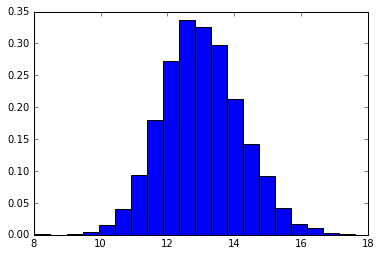

In [22]:
mediaA = []
for i in range(10000):
    mediaA.append(np.mean(np.random.choice(resultados_A.delta_t,size = 100)))
x_barra = pd.Series(mediaA)
plt.hist(x_barra, bins = 20, normed = 1)

O grafico acima representa o histograma baseado na media das médias amostrais.

(array([  1.39288861e-03,   5.33940633e-03,   1.57860709e-02,
          4.71260645e-02,   9.35556848e-02,   1.77593297e-01,
          2.49094913e-01,   3.01328235e-01,   3.39864820e-01,
          3.19203639e-01,   2.68827501e-01,   1.98254478e-01,
          1.34645899e-01,   8.84484266e-02,   4.31795468e-02,
          2.04290329e-02,   1.06788127e-02,   5.33940633e-03,
          1.16074051e-03,   2.32148101e-04]),
 array([  9.18902  ,   9.6197795,  10.050539 ,  10.4812985,  10.912058 ,
         11.3428175,  11.773577 ,  12.2043365,  12.635096 ,  13.0658555,
         13.496615 ,  13.9273745,  14.358134 ,  14.7888935,  15.219653 ,
         15.6504125,  16.081172 ,  16.5119315,  16.942691 ,  17.3734505,
         17.80421  ]),
 <a list of 20 Patch objects>)

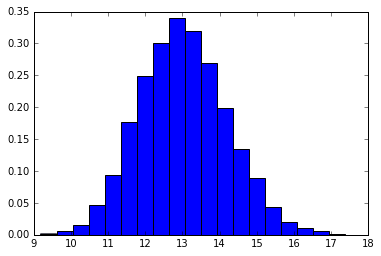

In [23]:
mediaA = []
for i in range(10000):
    mediaA.append(np.mean(np.random.choice(resultados_A.delta_t,size = 100)))
x_barra = pd.Series(mediaA)
plt.hist(x_barra, bins = 20, normed = 1)

## Conclusão 

Apesar de possuirm uma diferença mínima, em média, a versão B possui um desvio padrão menor, o que mostra que os dados tem uma maior concentração a cerca da média. Portanto o a versão B pode ser conciderada a mais rápida; este tipo de conclusão aplicado em um cenário real poderia economizar ou até gerar dinheiro para os desenvolvedores de marketing digital.